### Theoretical methods of deep learning: Homework assignment 5

Submit solution by uploading to canvas, **by Sunday, December 11th, 23:59**

**Task 1.** 

1. Consider a deep linear network with the constant width $d=1$ and depth $K\ge 1$ (i.e., $\widetilde f(x)=w_Kw_{K-1}\cdots w_1x$). Suppose that the ground truth linear map is given by $y=rx.$ Will the gradient descent converge to the true linear map? Consider two scenarios: $r$ is positive or negative. Also, consider two initialization options:
 - The initial values of the weights are all equal to 1.
 - The initial values of the weights are different positive numbers. 

2. Describe and classify the stationary points of the GD dynamics from item 1:  which are local minima, which are global minima, which are saddle points. Are there any spurious local minima? 

3. Verify your predictions from item 1 experimentally, plot the trajectories of the weights and loss values.  

4. Consider a deep linear network with constant width $d>1$. Suppose that the ground truth linear map is given by $\mathbf y=R\mathbf x$ with some $R=R^*\in\mathbb R^{d\times d},$ and the covariance matrix $\Sigma$ of input vectors $\mathbf x$ is scalar. Suppose that the weight matrices $W_k$ describing transitions between layers are initialized by scalar matrices ($(W_k)_{mn}=c_k\delta_{mn}$). What can we say theoretically about convergence of gradient descent?

5. Verify your theoretical predictions from item 4 experimentally. Implement a deep linear network (e.g., with depth $K=5$ and width $d=5$). Generate a big random training set  using a standard Gaussian distribution for the values of $\mathbf x$, or use a deterministic set with a scalar covariance matrix $\Sigma$. Generate a random symmetric matrix $R$. Consider two options for initializing $W_k$: in one case initialize them by identity matrices; in the other case initialize them by scalar matrices $c_k\delta_{mn}$, with $c_k$ uniformly distributed between $0.5$ and $1.5$. Perform gradient descent and observe if convergence pattern agrees with the theoretically expected. 

In [98]:
import numpy as np


def gd_test(K, n_iters, lr, r, random=False):
    if random:
        w = [np.random.rand() for _ in range(K)]
        #print(w)
    else:
        w = [1 for _ in range(K)]
    D = np.prod(w) - r
    loss, history = [D ** 2], []
    for _ in range(n_iters):
        new_w = [1 for _ in range(K)]
        for i in range(len(w)):
            grad = np.prod(w[:i] + w[i + 1:], dtype=object) * D
            new_w[i] = w[i] - lr * grad
        w = new_w
        history += [w]
        D = np.prod(w) - r
        loss += [D ** 2]
    return history, loss[1:]
    

## $w_i(0) = 1$

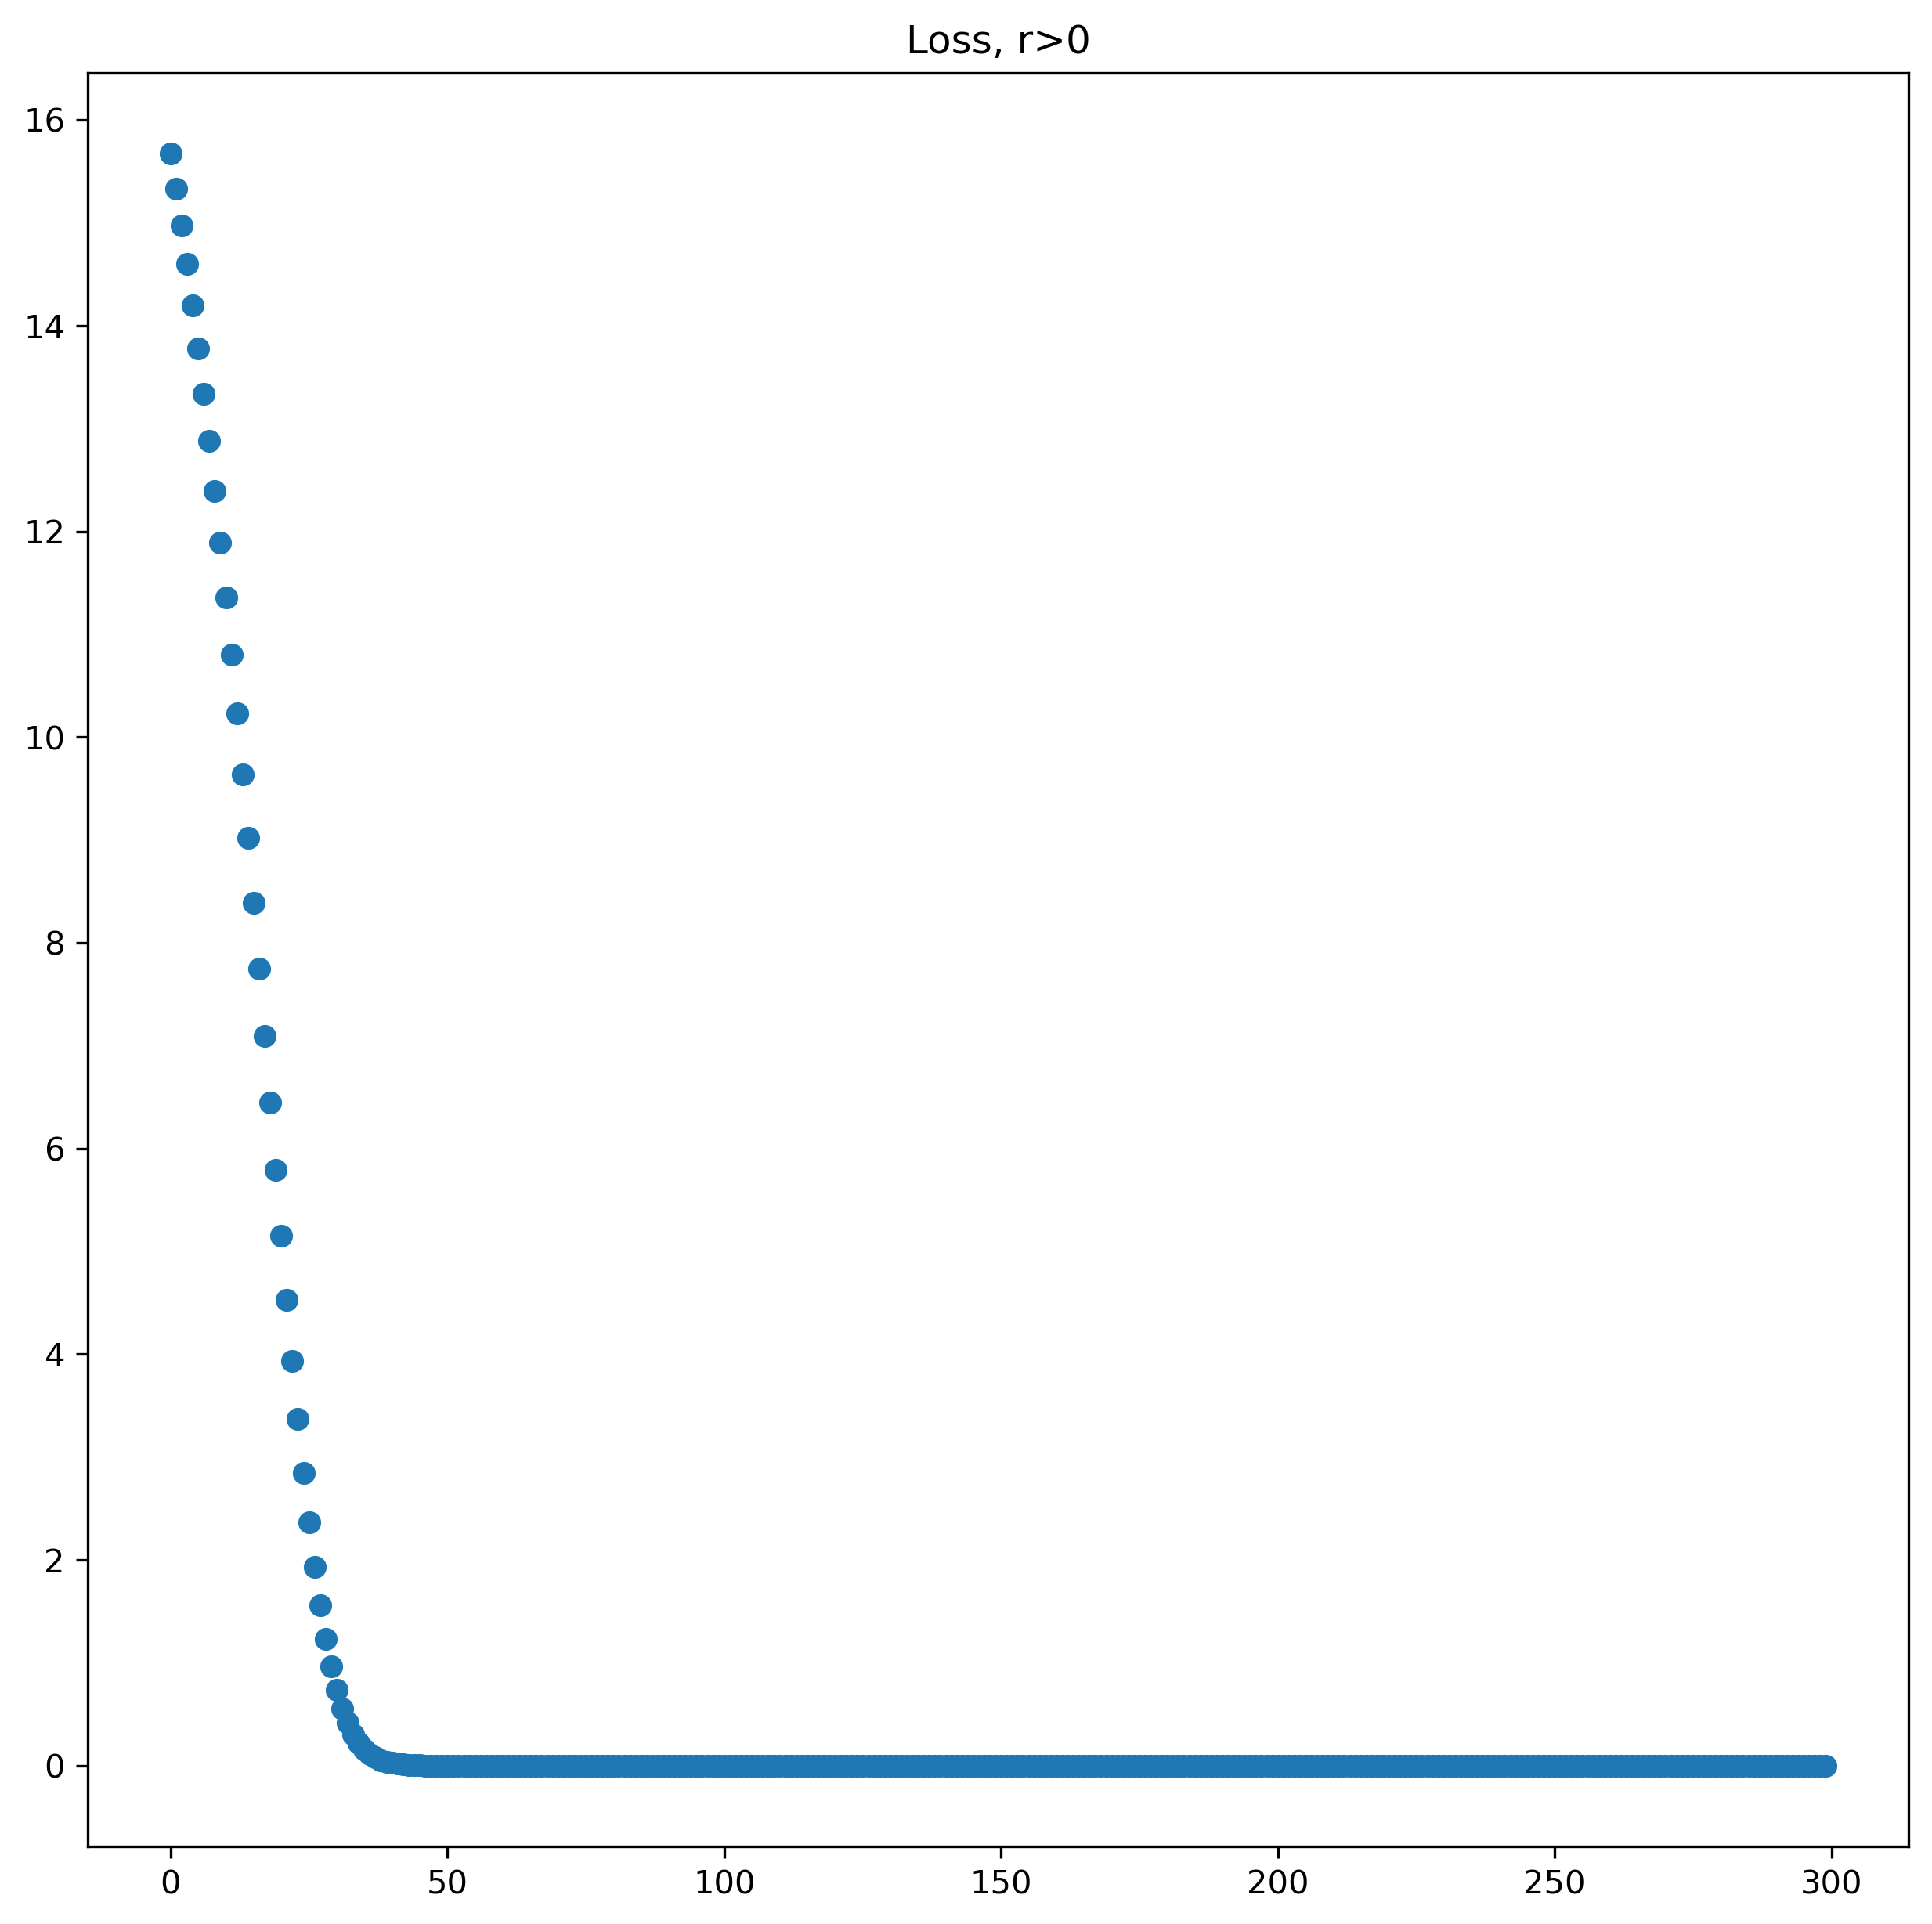

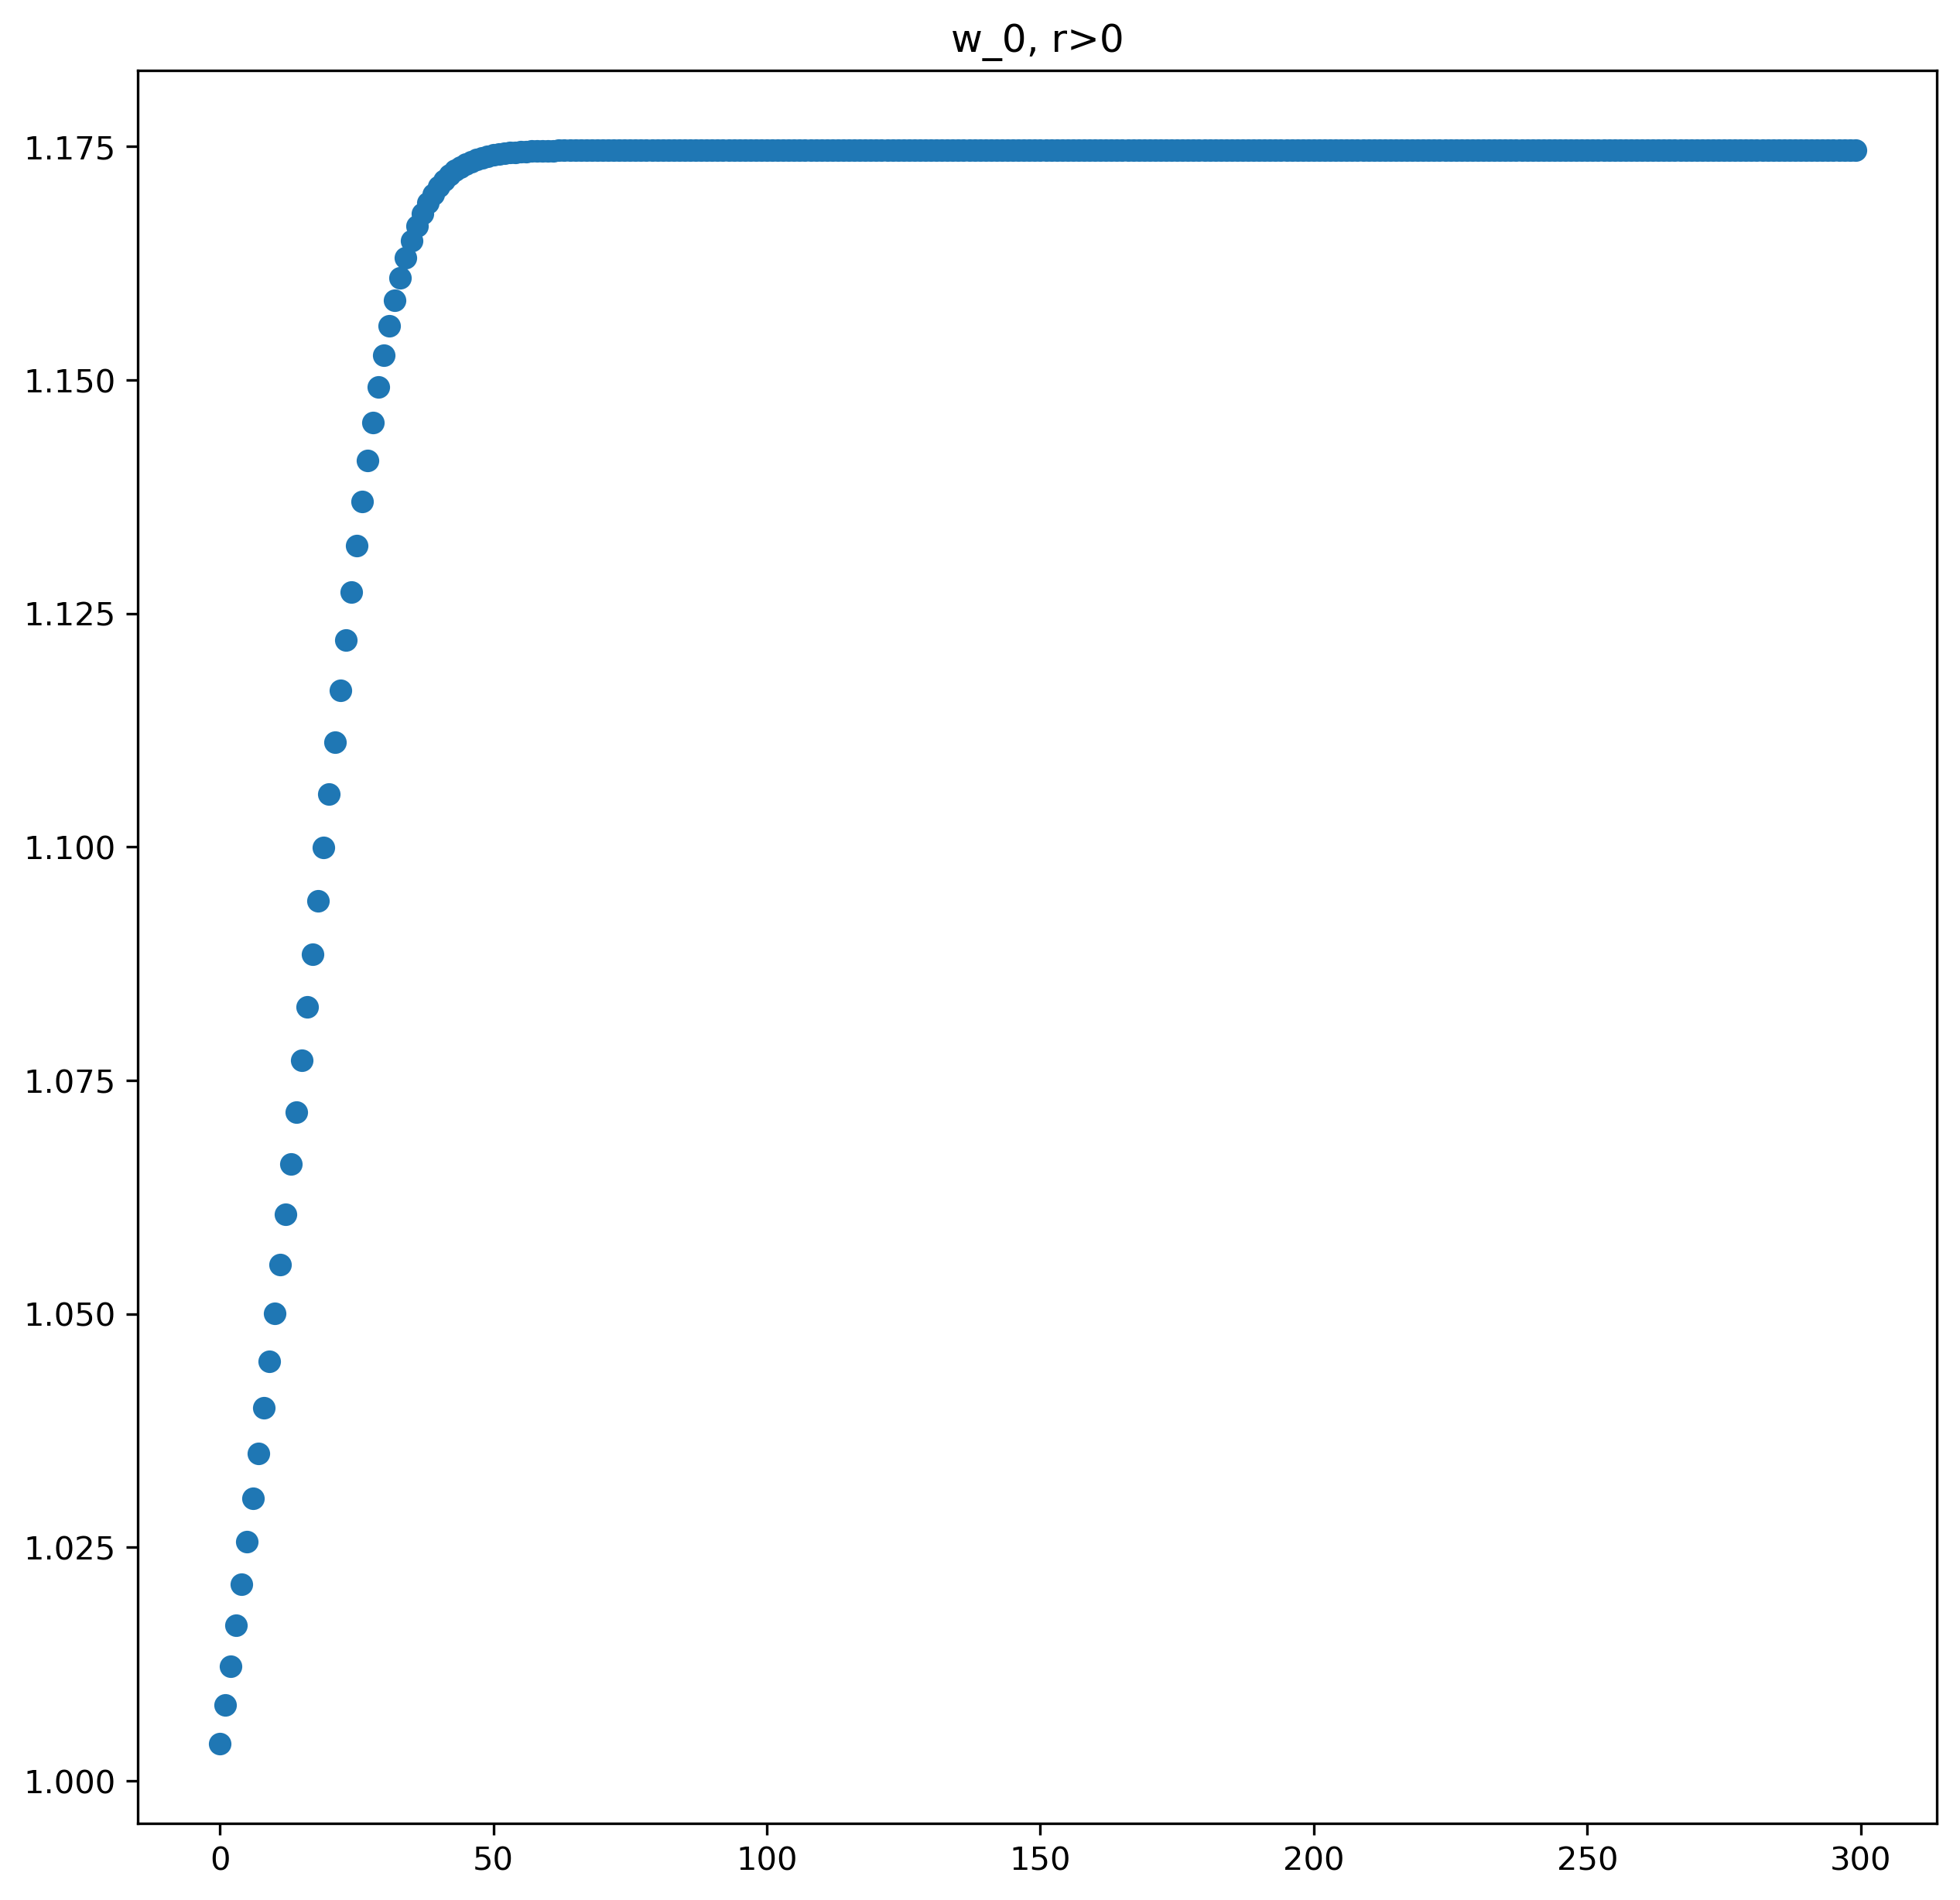

In [83]:
import matplotlib.pyplot as plt

hist, loss = gd_test(10, 300, 1e-3, 5)

plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(list(range(300)), loss)
plt.title('Loss, r>0')
plt.show();

plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(list(range(300)), np.array(hist)[:, 0])
plt.title('w_0, r>0');

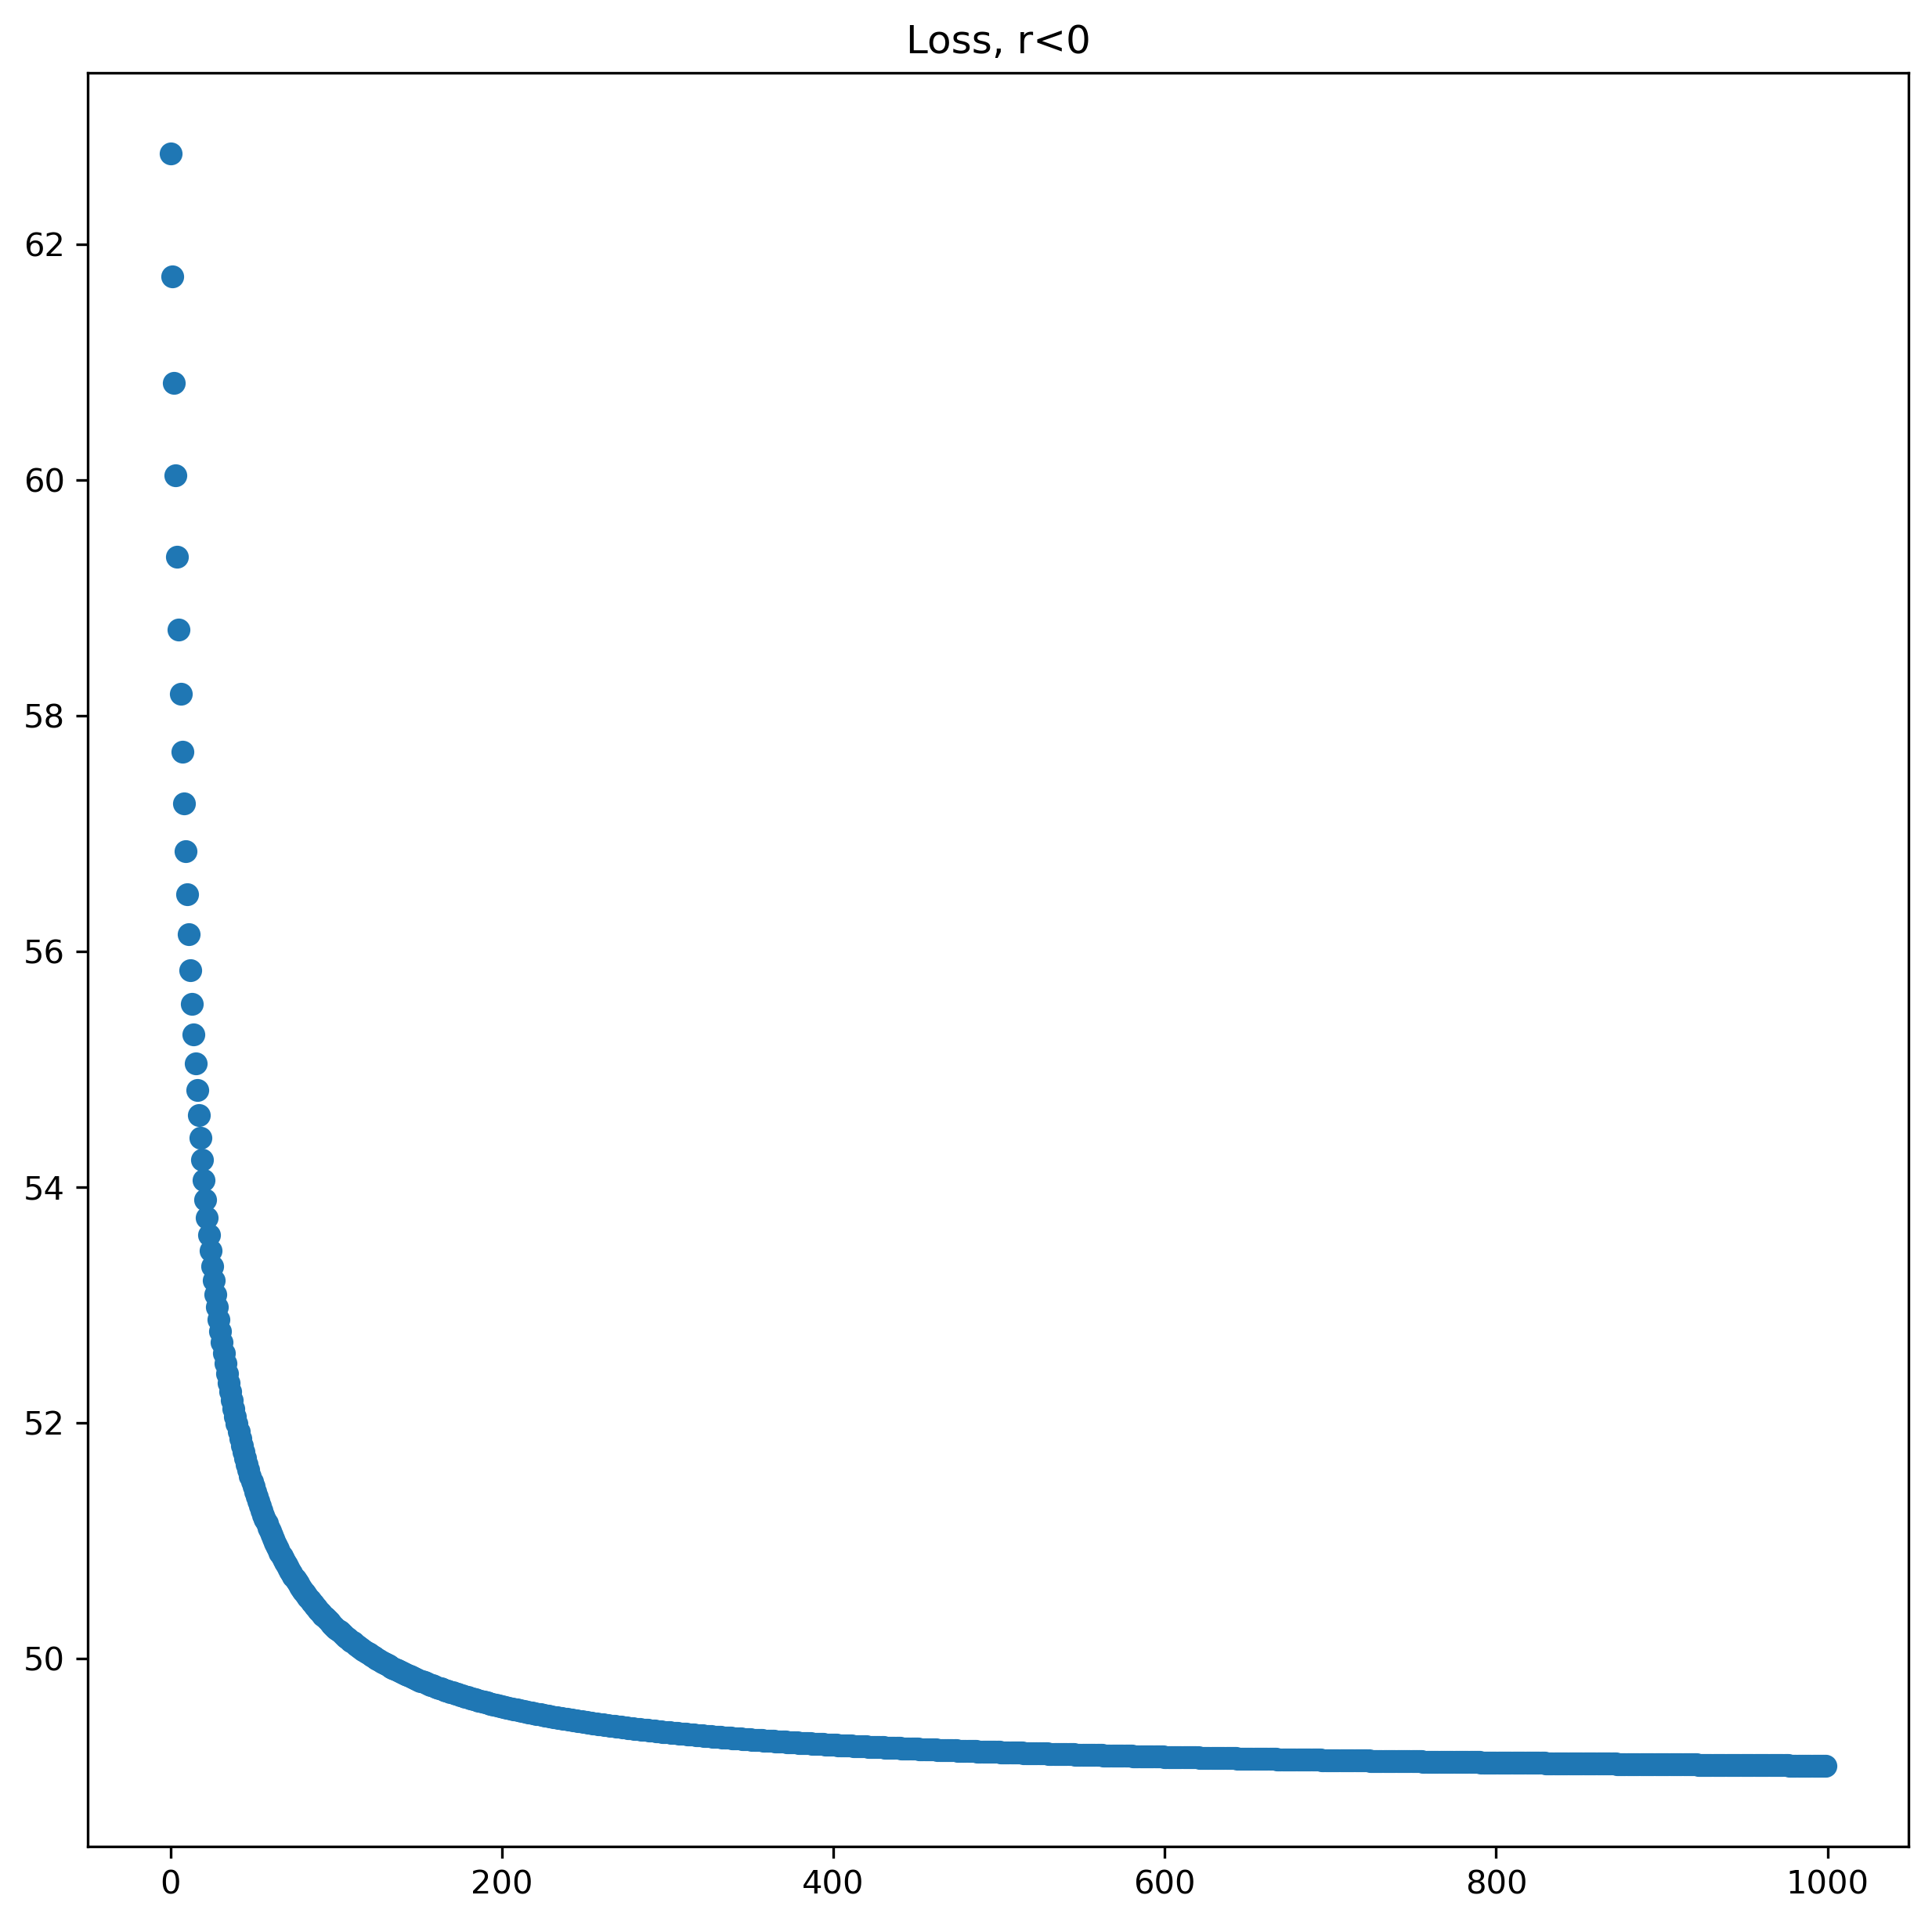

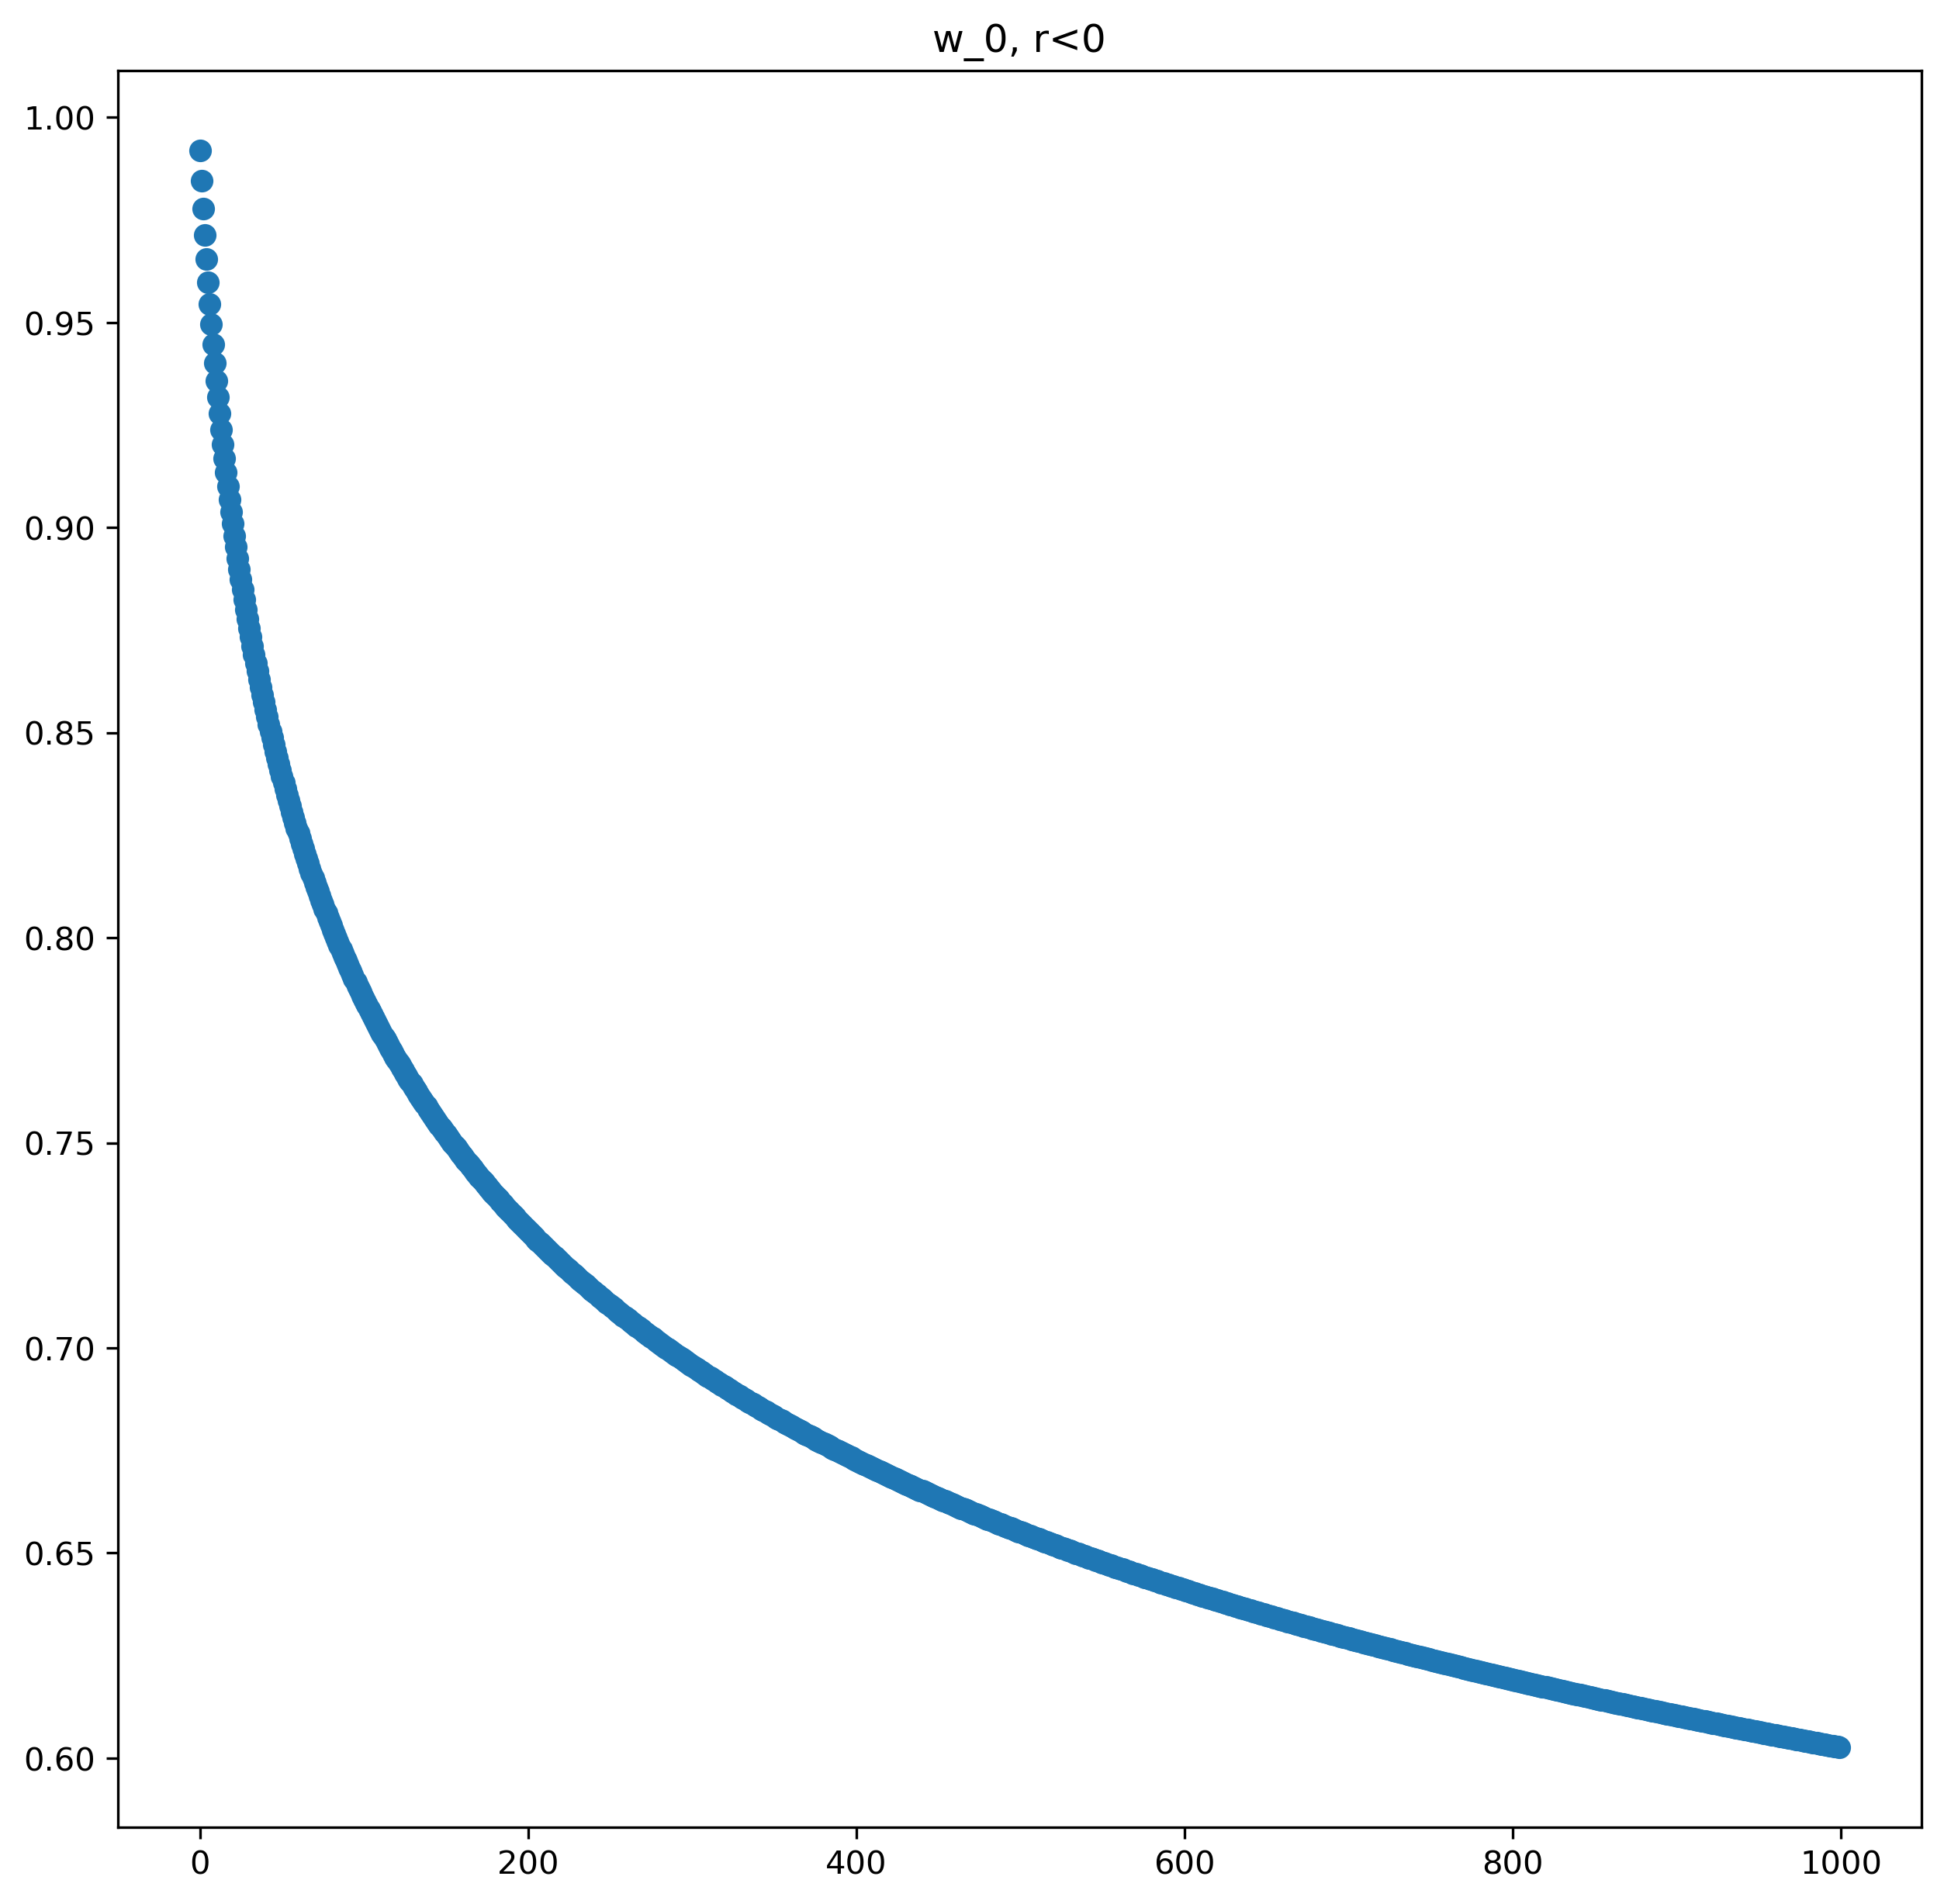

In [87]:
hist, loss = gd_test(10, 1000, 1e-3, -7)
plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(list(range(1000)), loss)
plt.title('Loss, r<0')
plt.show();

plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(list(range(1000)), np.array(hist)[:, 0])
plt.title('w_0, r<0');

## Random weights

[0.8669604561888692, 0.5333900281430646, 0.8618252765802035]


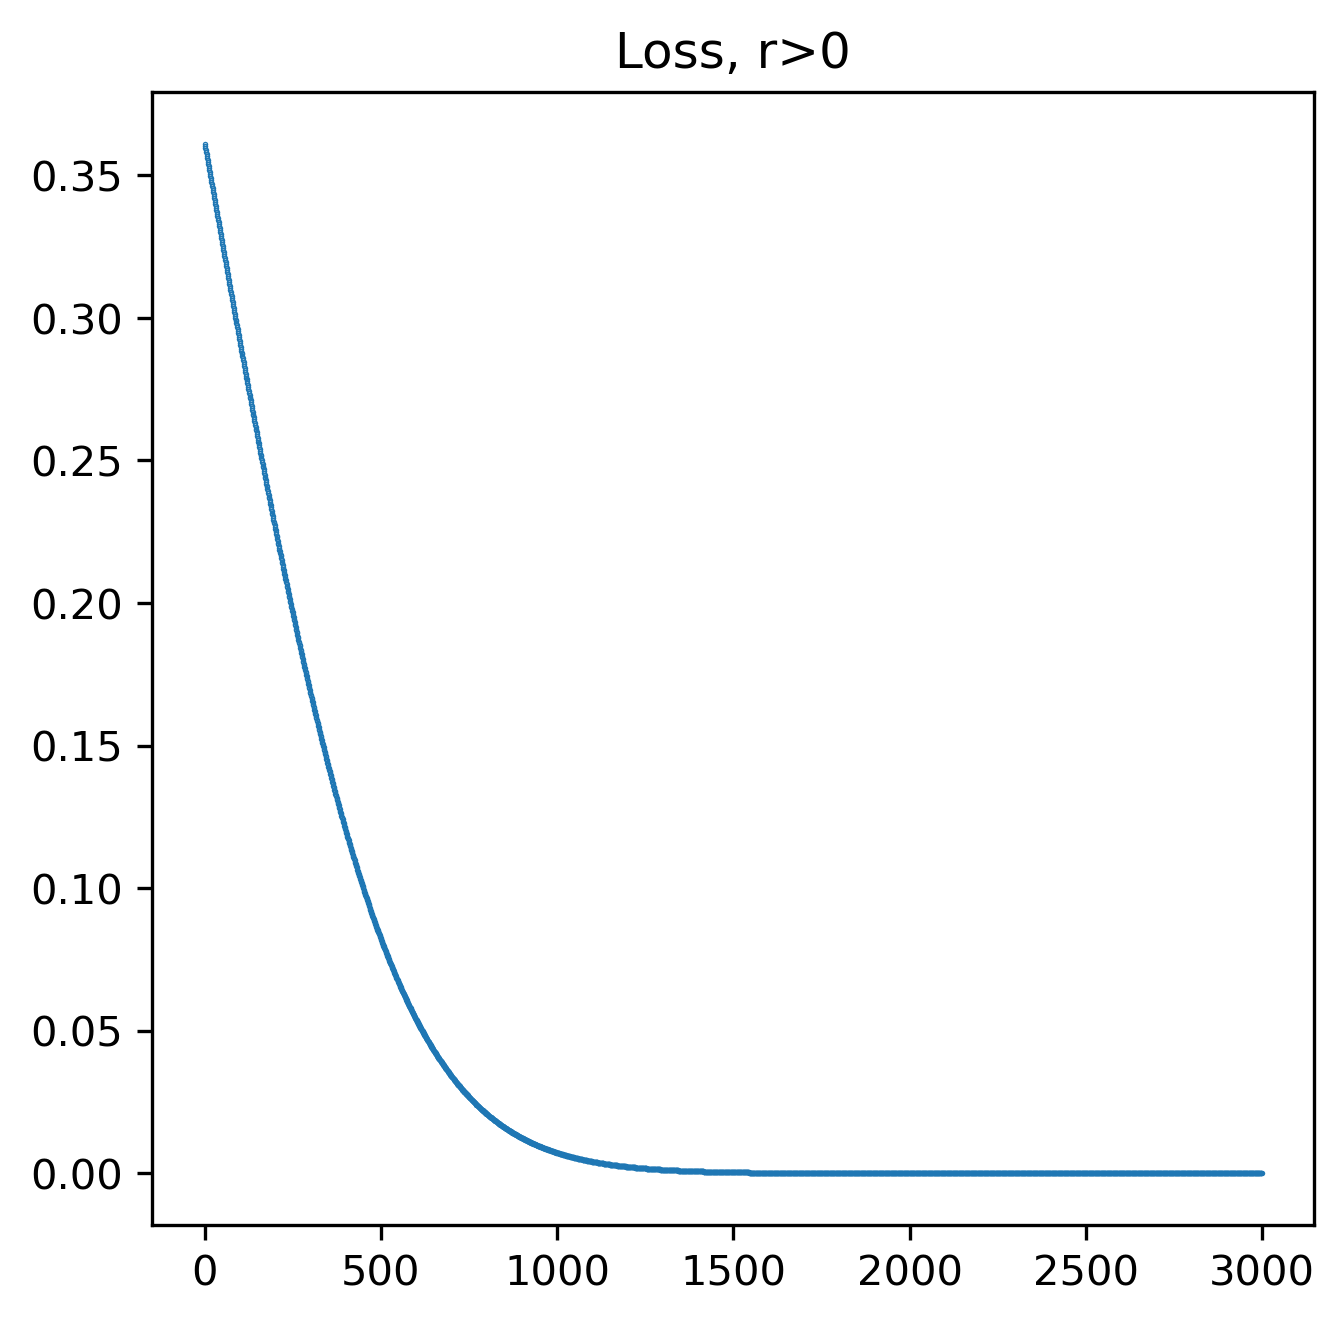

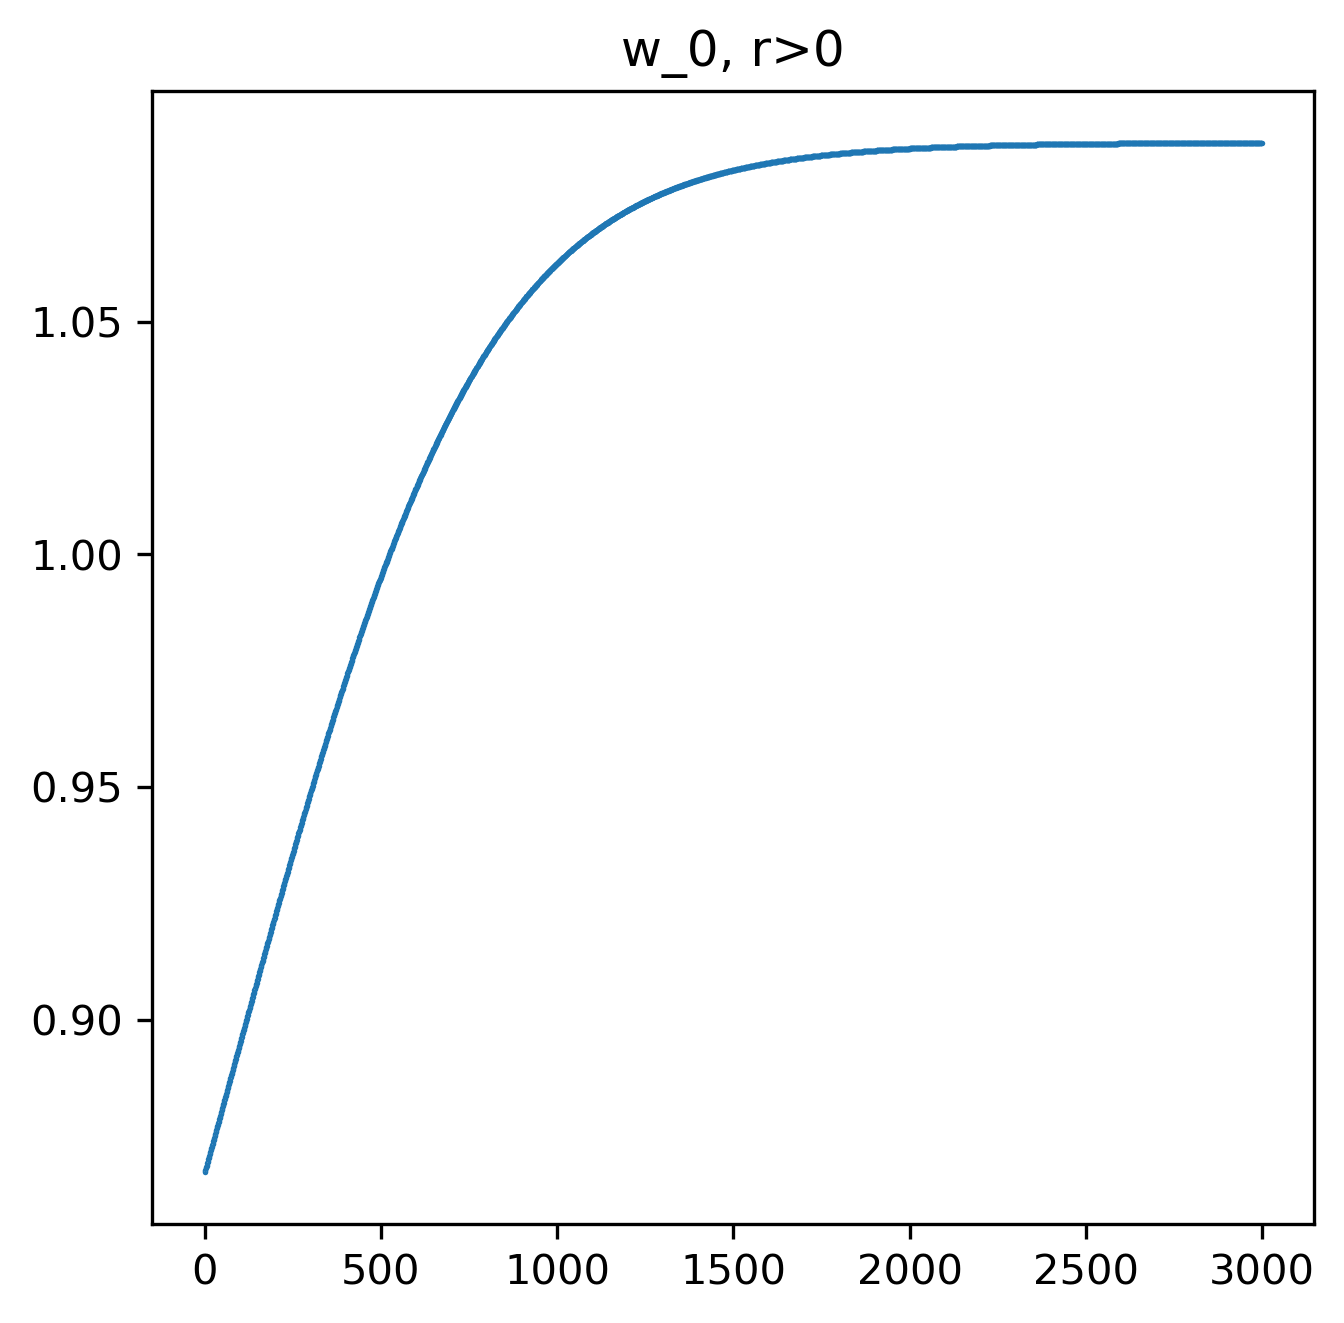

In [107]:
hist, loss = gd_test(3, 3000, 1e-3, 1, random=True)
plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(list(range(3000)), loss, s=0.1)
plt.title('Loss, r>0')
plt.show();

plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(list(range(3000)), np.array(hist)[:, 0], s=0.1)
plt.title('w_0, r>0');

[0.7419322739720577, 0.9758275737361792, 0.3691296881200651]


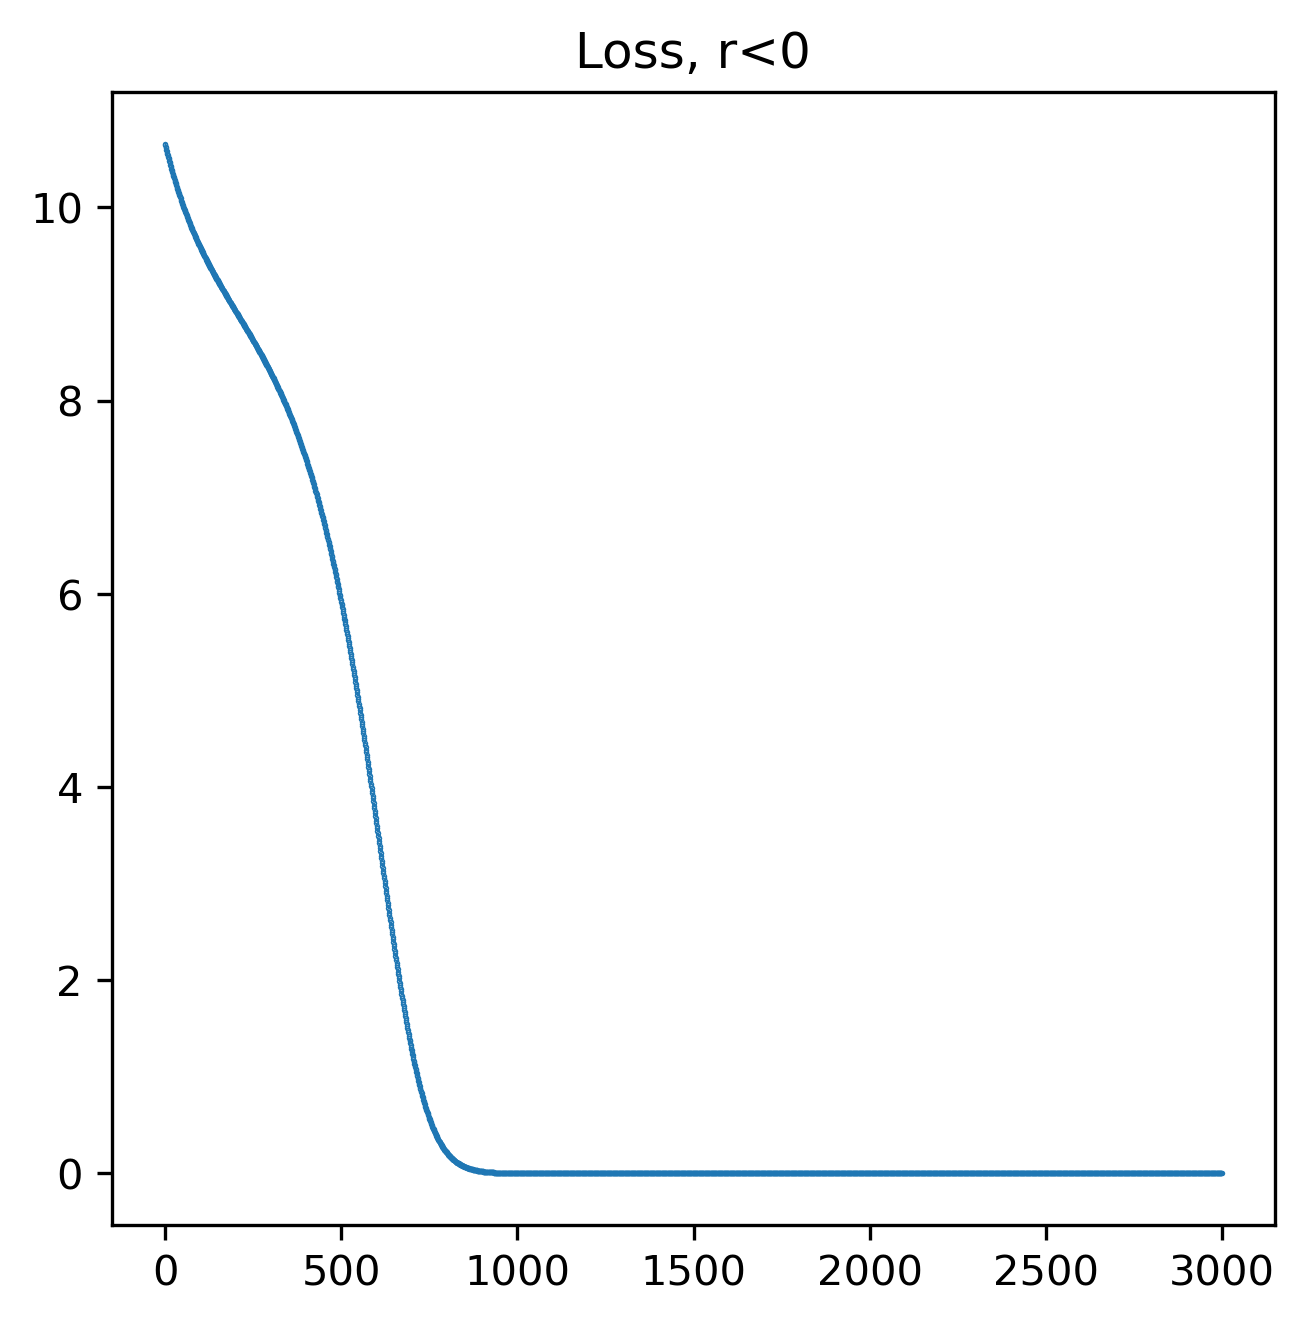

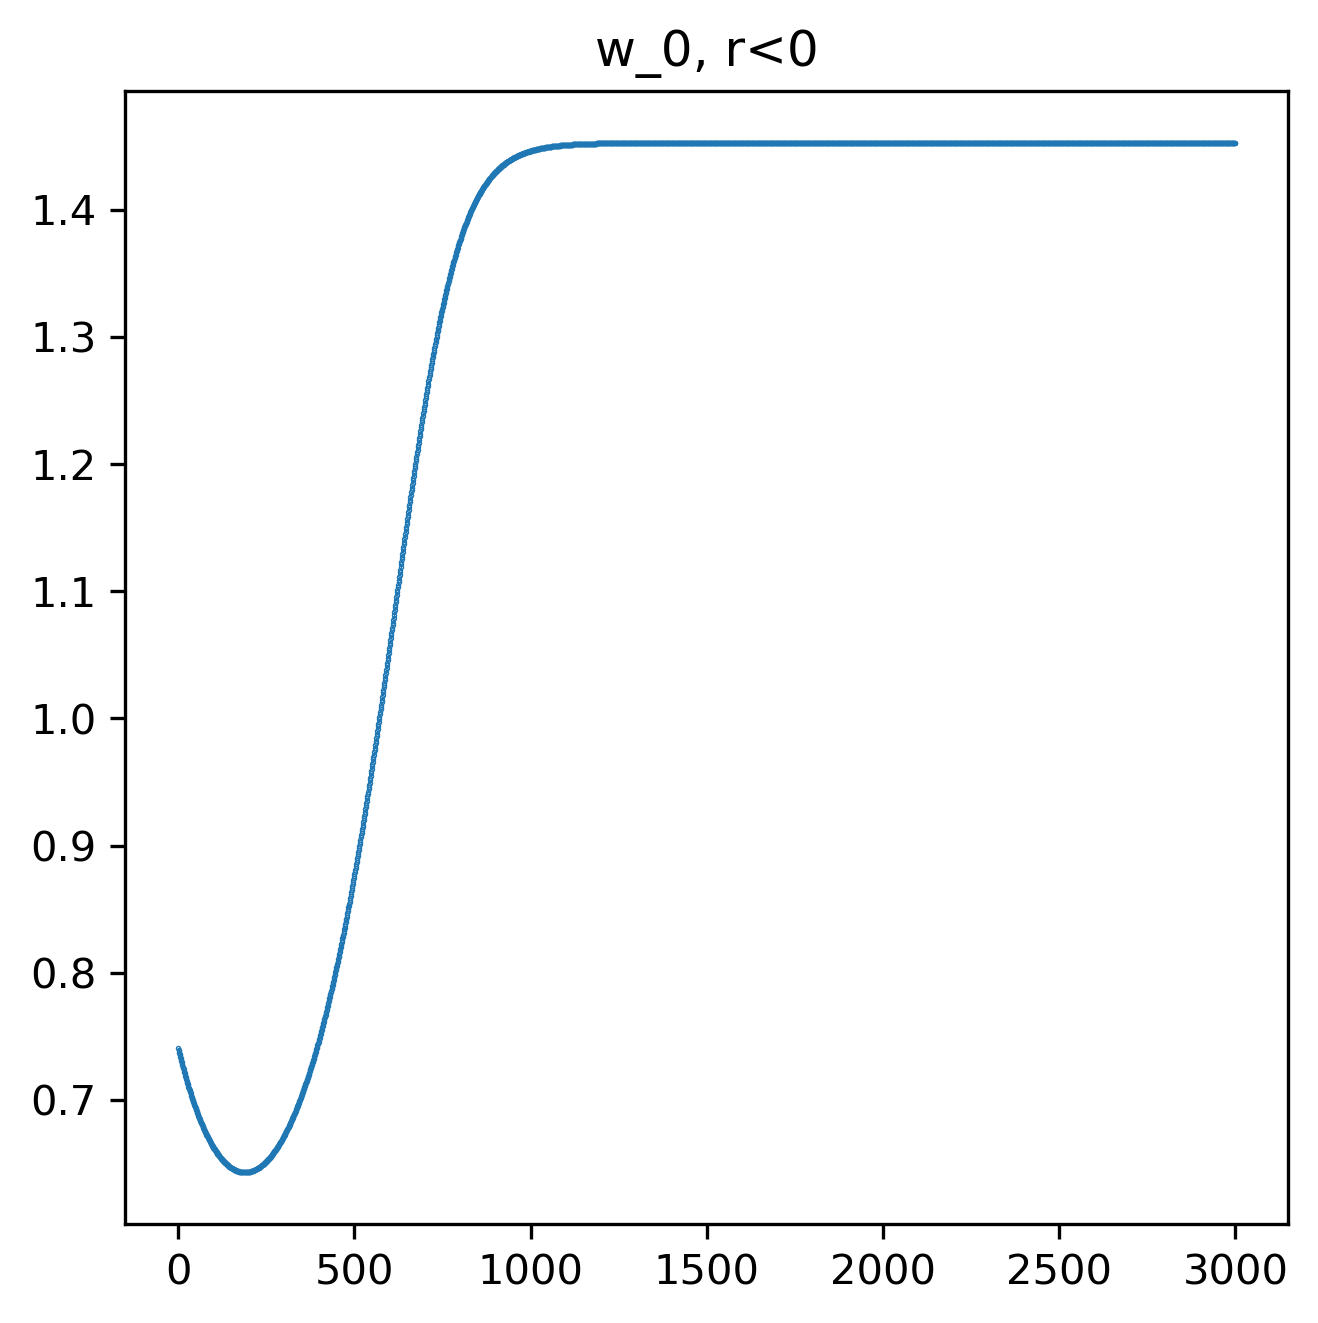

In [106]:
hist, loss = gd_test(3, 3000, 1e-3, -3, random=True)
plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(list(range(3000)), loss, s=0.1)
plt.title('Loss, r<0')
plt.show();

plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(list(range(3000)), np.array(hist)[:, 0], s=0.1)
plt.title('w_0, r<0');

$\DeclareMathOperator{\Tr}{Tr}$
1. From lectures
$$ 
\frac{d w^2_k}{dt} = 2q(r - q), \quad q = w_1 \ldots w_K
$$
<br>
Let's consider $w_i(0) = 1 \quad \forall i \in \overline{1, K}$: <br>
If $r > 1$: <br>
We can see that $\forall k \in \overline{1, K} \rightarrow \frac{d w^2_k}{dt}\big|_{t=0} > 0$ that means that $w_k$ are increasing until $r = q$ and then $\frac{d w^2_k}{dt}$ becomes $0$. <br>
If $0 < r < 1$: <br>
$\forall k \in \overline{1, K} \rightarrow \frac{d w^2_k}{dt}\big|_{t=0} < 0$ $\Rightarrow$ $w_k$ are decreasing until $r = q$ and then $\frac{d w^2_k}{dt}$ becomes $0$. <br>
In both previous cases $\frac{d w^2_k}{dt} = 0 \Rightarrow \frac{d w_k}{dt} = 0$ since $w_1 \ldots w_K = r > 0$. <br>
If $r < 0$: <br>
$\forall k \in \overline{1, K} \rightarrow \frac{d w^2_k}{dt}\big|_{t=0} < 0$. So all of the $w_k$ are decreasing while one of them doesn't reach $0$. Let $w_1$ be the first weight to reach $0$. Since every other weight is still positive, we have:
$$ 
\frac{d w_1}{d t} = w_2 \ldots w_K (r - w_1 \ldots w_K) = r w_2 \ldots w_K < 0
$$
So $w_1$ will keep decreasing. Only if one weight becomes $0$ at a time $w_1 \ldots w_K$ will converge to $r$. (then $\frac{d w^2_k}{dt}$ becomes $0$). <br>
If we have 2 weights $(w_1, w_2)$ that are 0 simultaneously, then: 
$$
\frac{d w_1}{d t} = w_2 \ldots w_K (r - w_1 \ldots w_K) = r w_2 \ldots w_K = 0
$$
<br>
$$
\frac{d w_2}{d t} = w_1w_3 \ldots w_K (r - w_1 \ldots w_K) = r w_1w_3 \ldots w_K = 0
$$
<br>
And for every other $w_i$ we also have $\frac{dw_i}{dt} = 0$, so $w_1 \ldots w_K$ gets stuck at $0$. <br>
Let's now consider the case when initial values of the weights are different positive numbers. <br>
The case when $r > 0$ and $w_1(0) \ldots w_K(0) < r$ is equivalent to the previous and we will converge to $r$. <br>
If $r > 0$ and $w_1(0) \ldots w_K(0) > r$ all $w_i$ will decrease. Since $w_1(t) \ldots w_K(0)$ is a continious function on $t$ it will first reach $r$ before becoming $0$, so none of the weights will become $0$ before $w_1 \ldots w_K$ reaches $r$ $\Rightarrow$ will converge. <br>
For $r < 0$ reasoning is the same as for the $w_i(0) = 1$ case.
2. All stationary points satisfy $w_1 \ldots w_K = r$ or $\exists i, j: i \neq j \; \text{and} \; w_i = w_j = 0$. Since $(w_1 \ldots w_K - r)^2 \geq 0$, $w_1 \ldots w_K = r$ is a global minimum. <br>
Now if we have some $w_i$ that are 0, then this point is a saddle point. Let $A$ be the set of all indicies $i$ such that $w_i \neq 0$. For simplicity assume that $\prod_{i \in A} w_i > 0$. Now if we shift all zero elements on $\delta$ we will get:
$$\tilde w_1 \ldots \tilde w_K = \delta^{K - |A|} $$
Now if we change exactly one of the shifted weights to $-\delta$ we will get:
$$\tilde w_1 \ldots \tilde w_K = -\delta^{K - |A|}$$
$$ (r -\delta^{K - |A|})^2 < r^2 < (r + \delta^{K - |A|})^2$$
Since $\delta$ can be taken arbirtary small we get that this is a saddle point.
4.
$$\Sigma = \sigma I$$
$$\Delta = c_K \ldots c_1 I - R$$
$$L = \frac{1}{2} \Tr(\Delta^* \Delta \Sigma) = \frac{\sigma}{2} \Tr(c_1 \ldots c_K I - R)^2 $$
$$\nabla_{c_k} L = c_1 \ldots c_{k - 1} c_{k + 1} \ldots c_K (c_K \ldots c_1 - R_{kk})$$

In [145]:
def gd_test_md(n_iters, lr, r, initial_indentity=False):
    if initial_indentity:
        w = [np.eye(5) for _ in range(5)]
    else:
        w = [np.random.uniform(0.5, 1.5) * np.eye(5) for _ in range(K)]
        
    D = np.eye(5)
    for i in w:
        D = np.dot(i, D)
    D = D - r
    
    loss, history = [np.trace(np.dot(D, D.T))], []
    for _ in range(n_iters):
        new_w = [np.eye(5) for _ in range(5)]
        for i in range(5):
            grad = np.eye(5)
            for m in w[:i]:
                grad = np.dot(grad, m.T)
                
            for m in w[i + 1:][-1::-1]:
                grad = np.dot(m.T, grad)
                
            new_w[i] = w[i] - lr * grad
        w = new_w
        history += [w]
        
        D = np.eye(5)
        for i in w:
            D = np.dot(i, D)
        D = D - r
        
        loss += [np.trace(np.dot(D, D.T))]
    return history, loss[1:]
    

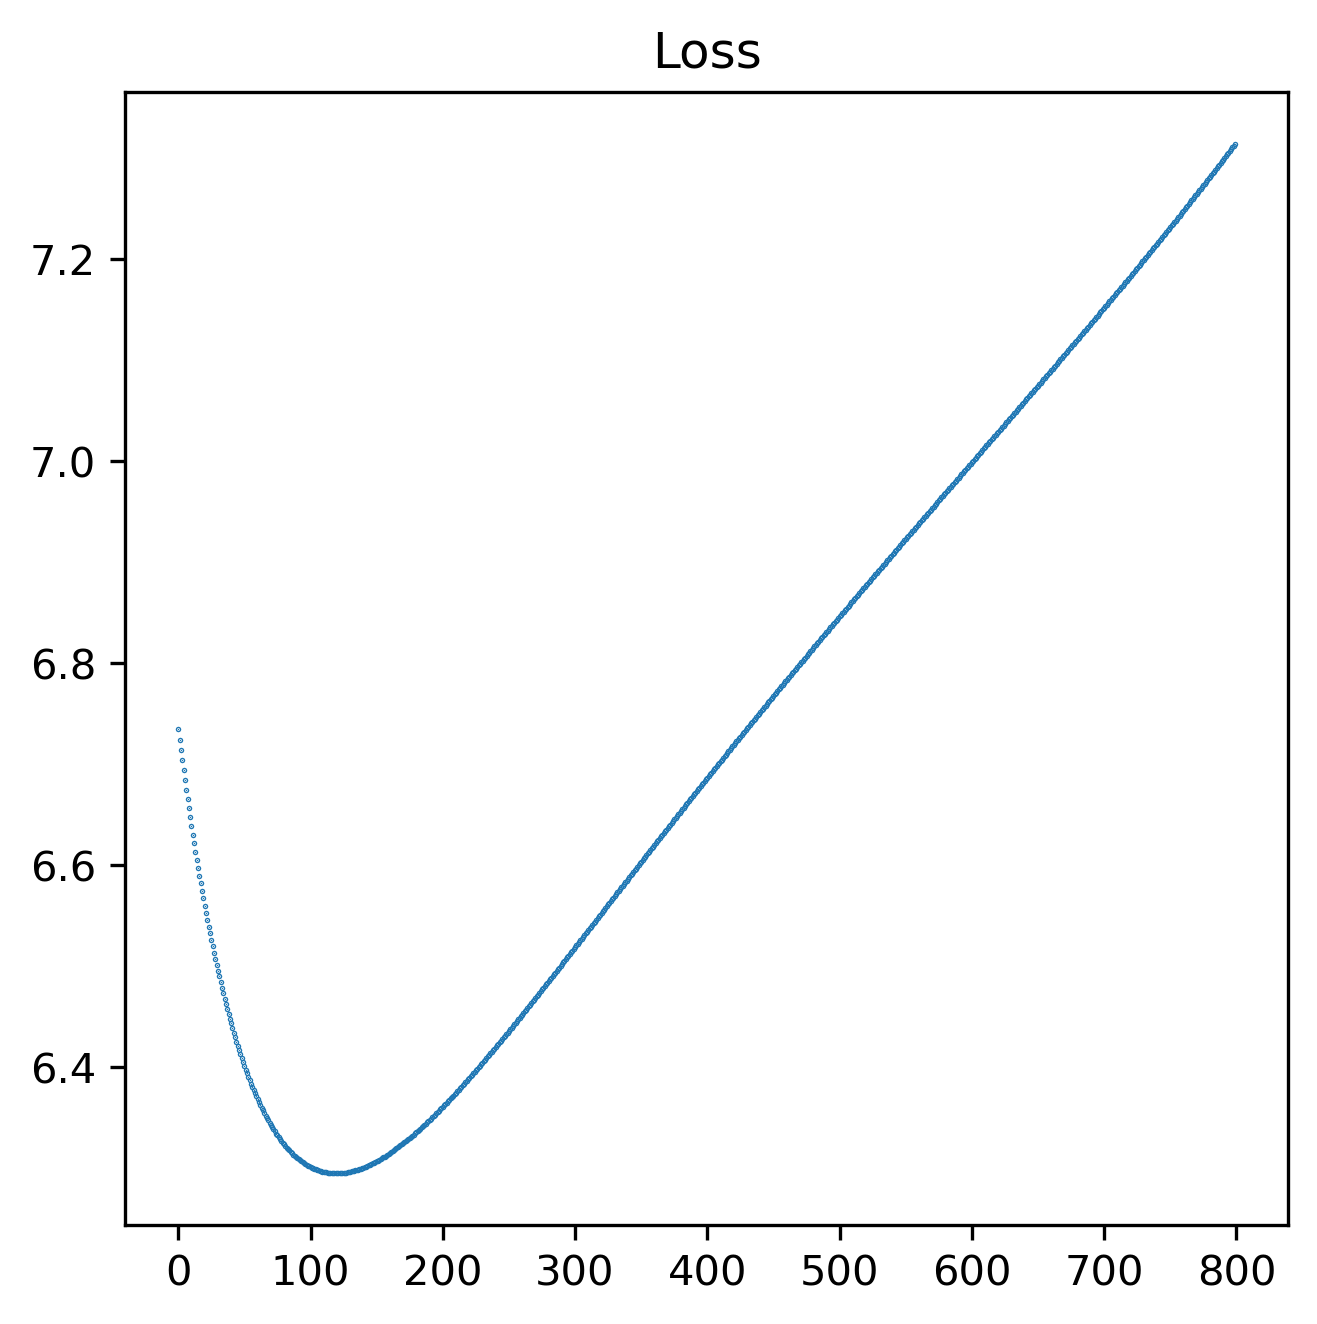

In [150]:
R = np.random.rand(5, 5)
R = (R + R.T) / 2
hist, loss = gd_test_md(800, 1e-3, R)
plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(list(range(800)), loss, s=0.1)
plt.title('Loss')
plt.show();

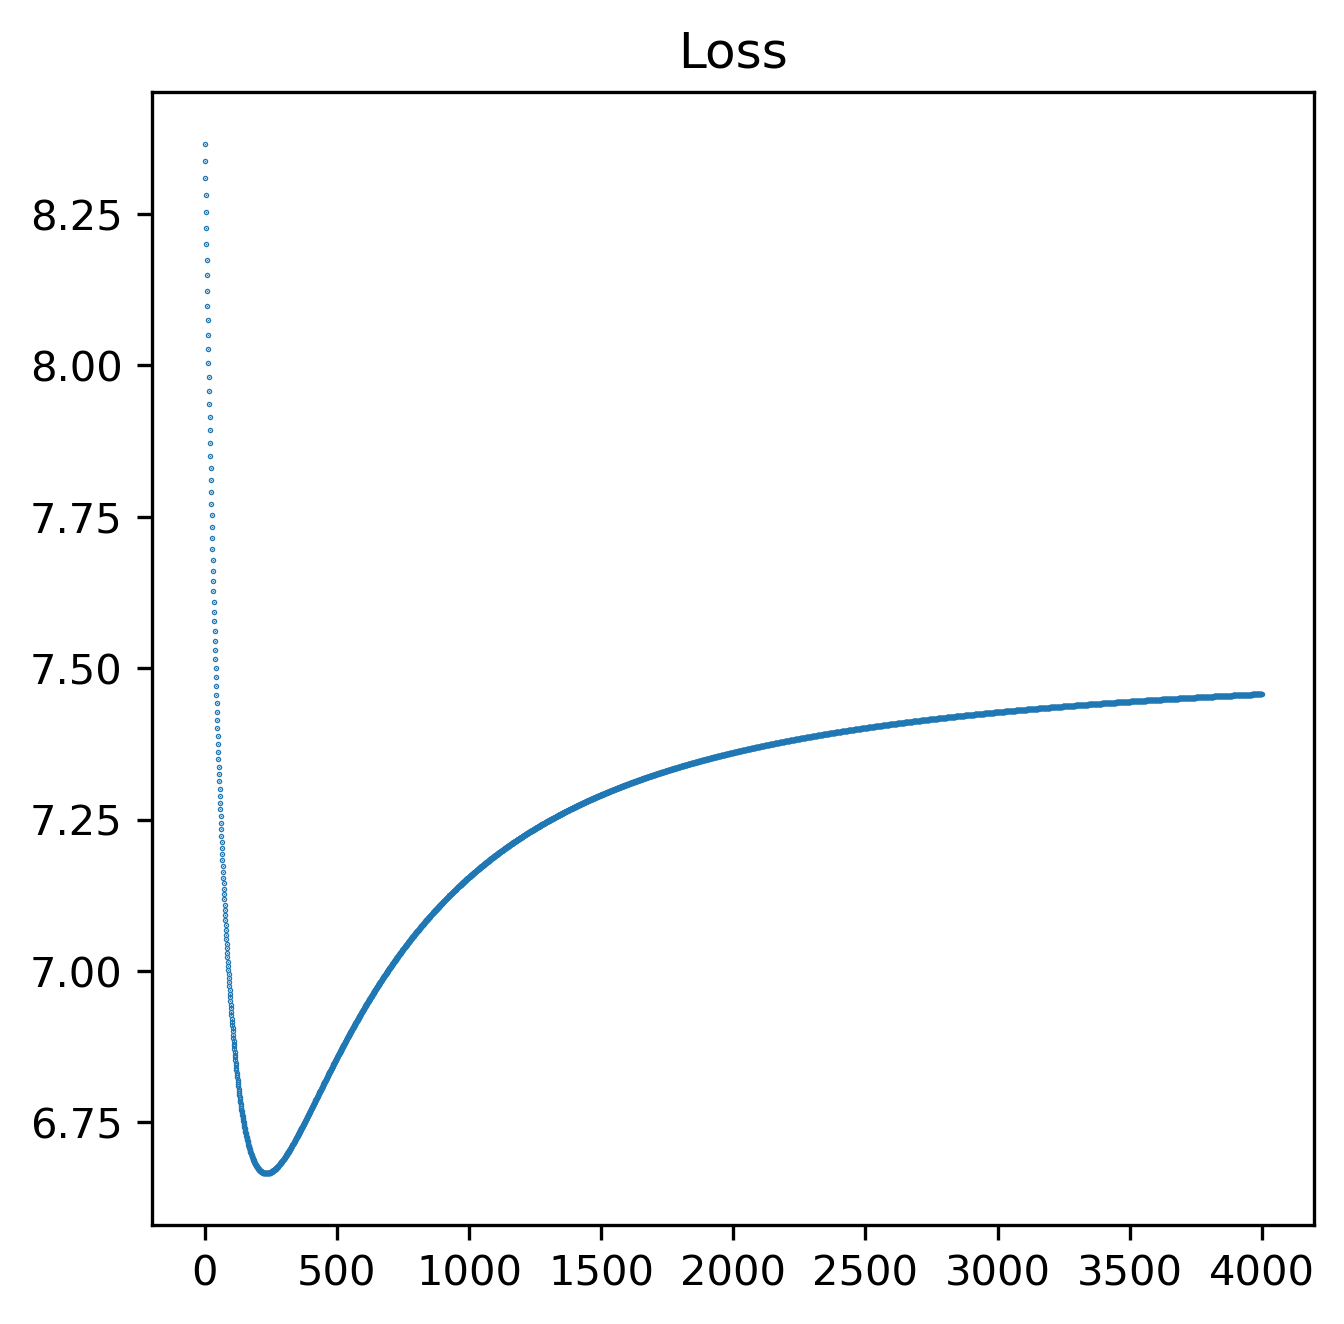

In [147]:
R = np.random.rand(5, 5)
R = (R + R.T) / 2
hist, loss = gd_test_md(4000, 1e-3, R, initial_indentity=True)
plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(list(range(4000)), loss, s=0.1)
plt.title('Loss, indetity initialization')
plt.show();

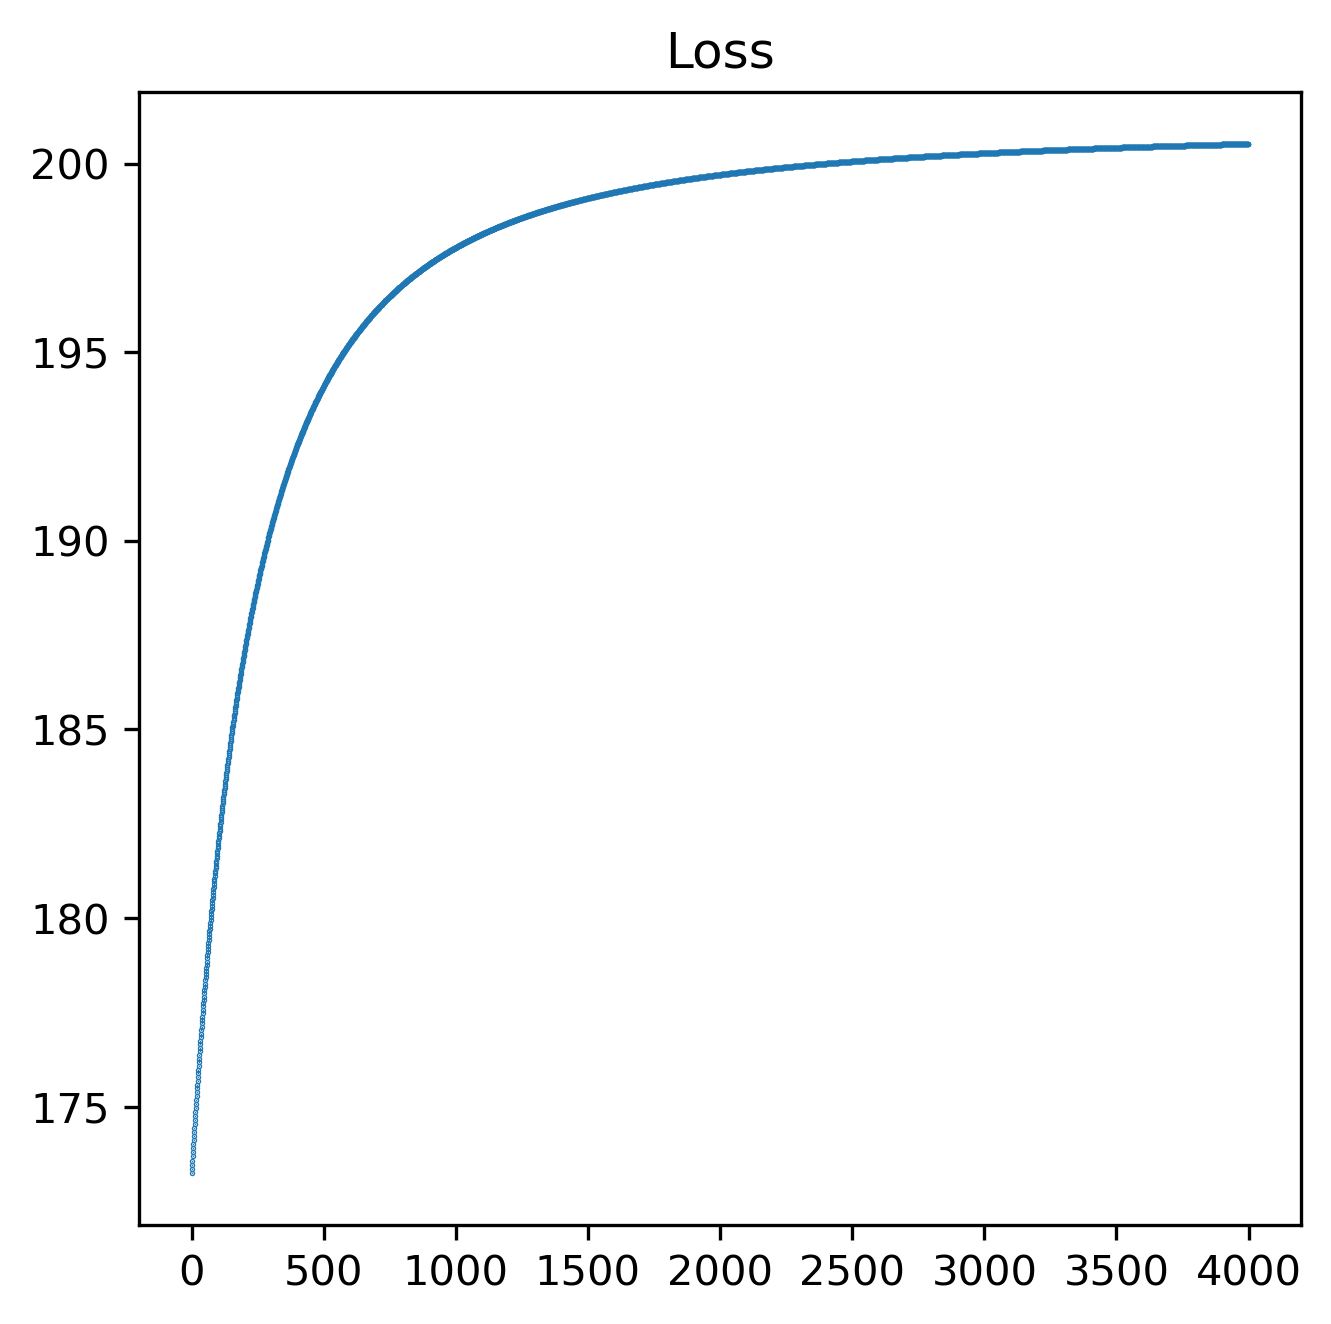

In [148]:
R = 5 * np.random.rand(5, 5)
R = (R + R.T) / 2
hist, loss = gd_test_md(4000, 1e-3, R, initial_indentity=True)
plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(list(range(4000)), loss, s=0.1)
plt.title('Loss, indetity initialization')
plt.show();

##### **Task 2.** 
Consider a shallow ReLU network with the NTK initialisation:

\begin{equation*}
    f(\mathbf{x}) = \frac{1}{\sqrt{n}} \sum\limits_{i=1}^n c_i \phi(\mathbf{w}_i^T \mathbf{x}), \quad \phi(z)=\operatorname{ReLU}(z).
\end{equation*}

Here $\mathbf{x}\in\mathbb{R}^d$ are the inputs, and $c_i\in\mathbb{R}, \mathbf{w}_i\in\mathbb{R}^d$ are trainable parameters with i.i.d. $\mathcal{N}(0,1)$ initialisation. The NTK (Neural Tangent Kernel) of the model is defined as

$$\Theta(\mathbf{x},\mathbf{x}')=\sum_k \frac{\partial f(\mathbf{x})}{\partial p_k}\frac{\partial f(\mathbf{x}')}{\partial p_k},$$

where $p_k$ are all the scalar parameters of the model (in our case including the coefficients $c_i$ and the components of $\mathbf w_i$).

Calculate the NTK $\Theta(\mathbf{x},\mathbf{x}')$ at initialisation in the infinite width limit $n\rightarrow \infty$. The NTK at points $\mathbf{x},\mathbf{x}'$ should be expressed as an explicit function depending on the lengths of the input vectors $r=|\mathbf{x}|, r'=|\mathbf{x}'|$, and the angle $\alpha$ between them. 

*Hint*: You can use the values of the following integrals involving the ReLU function $\phi(z)$ and the Heaviside step function $\theta(z)$ (recall that $\theta(z)=1$ if $z>0$ and $\theta(z)=0$ if $z < 0$). 

\begin{align*}
    &\int \phi(w_1 \cos \alpha + w_2 \sin \alpha) \phi(w_1) e^{-\frac{w_1^2+w_2^2}{2}}dw_1dw_2 = \sin \alpha + (\pi-\alpha)
    \cos \alpha,\\
    &\int \theta(w_1 \cos \alpha + w_2 \sin \alpha) \theta(w_1) e^{-\frac{w_1^2+w_2^2}{2}}dw_1dw_2 = \pi-\alpha.
\end{align*}

$$\Theta(\mathbf{x},\mathbf{x}') = \frac{1}{n} \sum_{i = 1}^n \left(\phi(\mathbf{w}_i^T \mathbf{x}) \phi(\mathbf{w}_i^T \mathbf{x}') + c_i^2 \sum_{k=1}^d \theta(\mathbf{w}_i^T \mathbf{x}) \theta(\mathbf{w}_i^T \mathbf{x}') x_k x'_k\right) $$
By the law of large numbers:
$$\Theta(\mathbf{x},\mathbf{x}') \overset{n \rightarrow \infty}{\rightarrow} E[(\phi(\mathbf{w}_1^T \mathbf{x}) \phi(\mathbf{w}_1^T \mathbf{x}')] + E[c_i^2 \theta(\mathbf{w}_1^T \mathbf{x}) \theta(\mathbf{w}_1^T \mathbf{x}') (\mathbf{x}, \mathbf{x}')]$$
Choose axes so that $x = (x_1, 0, 0, \ldots, 0)^T$ and $x' = (x_1', x_2', 0, \ldots, 0)^T$.  (Also I will rename $\mathbf{w}_1$ to $\mathbf{w}$ and $w_i$ will be the components of $\mathbf{w}$). We can always choose axis so that $x_1 > 0$.
$$
E[(\phi(\mathbf{w}_1^T \mathbf{x}) \phi(\mathbf{w}_1^T \mathbf{x}')] = \frac{1}{2 \pi} \int \int (\phi(w_1x_1) \phi(w_1x_1' + w_2x_2') e^{-\frac{w_1^2 + w_2^2}{2}} dw_1 dw_2
$$
<br>
$$
\phi(w_1x_1) \overset{x_1 > 0}{=} x_1 \phi(w_1) = |\mathbf{x}_1|\phi(w_1)
$$
<br>
$$
\phi(w_1x_1' + w_2x_2') = |x'| \phi \left(w_1\frac{x_1'}{|x'|} + w_2\frac{x_2'}{|x'|}\right) = \frac{1}{|x'|} \phi \left(w_1\cos \alpha + w_2\sin \alpha \right)
$$
<br>
$$
\cos \alpha = \frac{(\mathbf{x}, \mathbf{x}')}{|\mathbf{x}| |\mathbf{x}'|}
$$
<br>
$$
E[(\phi(\mathbf{w}_1^T \mathbf{x}) \phi(\mathbf{w}_1^T \mathbf{x}')] = \frac{|\mathbf{x}||\mathbf{x}'|}{2 \pi} \int \int (\phi(w_1) \phi \left(w_1\cos \alpha + w_2\sin \alpha \right) e^{-\frac{w_1^2 + w_2^2}{2}} dw_1 dw_2 = \frac{|\mathbf{x}||\mathbf{x}'|}{2 \pi} (\sin \alpha + (\pi-\alpha) \cos \alpha)
$$ 
<br>
$$
E[c_i^2 \theta(\mathbf{w}_1^T \mathbf{x}) \theta(\mathbf{w}_1^T \mathbf{x}') (\mathbf{x}, \mathbf{x}')] = E[c_i^2] E [\theta(\mathbf{w}_1^T \mathbf{x}) \theta(\mathbf{w}_1^T \mathbf{x}') (\mathbf{x}, \mathbf{x}')] = E [\theta(\mathbf{w}_1^T \mathbf{x}) \theta(\mathbf{w}_1^T \mathbf{x}')] (\mathbf{x}, \mathbf{x}')
$$
<br>
$$
E[\theta(\mathbf{w}_1^T \mathbf{x}) \theta(\mathbf{w}_1^T \mathbf{x}') = \frac{1}{2\pi} \int \int (\theta(w_1x_1) \theta(w_1x_1' + w_2x_2') e^{-\frac{w_1^2 + w_2^2}{2}} dw_1 dw_2 
$$
<br>
$$
\theta(w_1x_1) = \theta(w_1)
$$
<br>
$$
\theta(w_1x_1' + w_2x_2') = \theta \left( \frac{1}{|\mathbf{x}'|} (w_1 \cos \alpha + w_2 \sin \alpha) \right) = \theta(w_1 \cos \alpha + w_2 \sin \alpha)
$$
<br>
$$
E[\theta(\mathbf{w}_1^T \mathbf{x}) \theta(\mathbf{w}_1^T \mathbf{x}') = \frac{1}{2\pi} \int \int (\theta(w_1) \theta(w_1 \cos \alpha + w_2 \sin \alpha) e^{-\frac{w_1^2 + w_2^2}{2}} dw_1 dw_2 = \frac{\pi-\alpha}{2\pi}
$$
<br>
Finally,
$$\Theta(\mathbf{x},\mathbf{x}') \overset{n \rightarrow \infty}{\rightarrow} \frac{|\mathbf{x}||\mathbf{x}'|}{2\pi} (\sin \alpha + (\pi-\alpha) \cos \alpha) + \frac{\pi-\alpha}{2\pi} (\mathbf{x}, \mathbf{x}') = \frac{1}{2 \pi} \left(2\left(\pi - \arccos \frac{(\mathbf{x}, \mathbf{x}')}{|\mathbf{x}| |\mathbf{x}'|} \right)(\mathbf{x},\mathbf{x}') + \sqrt{|\mathbf{x}|^2|\mathbf{x}'|^2 - (\mathbf{x},\mathbf{x}')^2}\right)$$